In [44]:
import pandas as pd
from pandas import Series, DataFrame

import numpy as np 

import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns

In [28]:
#Importing data for the 2012 US Presidential Elections from the Huffington Post

import requests 
from io import StringIO

url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

source = requests.get(url).text
poll_data = StringIO(source)

poll_df = pd.read_csv(poll_data) 

#Looking at the first 4 rows of the imported dataset

poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [29]:
#Calculating the average of votes received by the different candidates

avg = poll_df.mean()
avg.drop(['Number of Observations', 'Question Text', 'Question Iteration'], axis = 0, inplace = True)

print(avg)

Obama        46.805461
Romney       44.614334
Undecided     6.550827
Other         3.376238
dtype: float64


In [30]:
#Calculating the standard deviation of votes received by the different candidates

std = poll_df.std()
std.drop(['Number of Observations', 'Question Text', 'Question Iteration'], axis = 0, inplace = True)

print(std)

Obama        2.422058
Romney       2.906180
Undecided    3.701754
Other        2.692726
dtype: float64


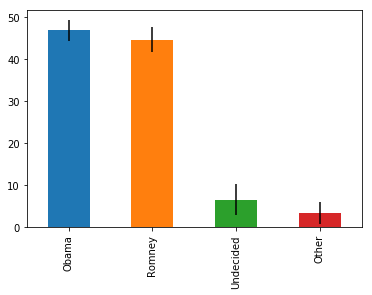

In [19]:
#Performing some diagnostic analytics - visualizing the mean and standard deviation of the number of votes received by the different candidates

avg.plot(yerr = std, kind = 'bar')

In [31]:
#Concatenating both mean and standard deviation into a single list

poll_avg = pd.concat([avg, std], axis = 1)
poll_avg.columns = ['Average', 'Standard Deviation']

In [32]:
#Printing out the concatenated results

poll_avg

,Average,Standard Deviation
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726


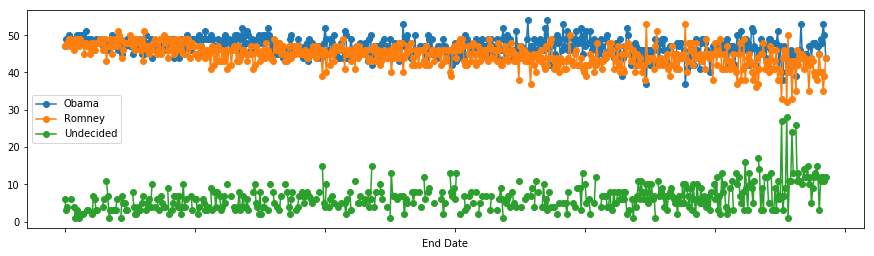

In [22]:
#Visualizing how the polls differ for Obama, Romney and other candidates over time

poll_df.plot(x = 'End Date', y = ['Obama', 'Romney', 'Undecided'], linestyle = '-', figsize = (15,4), marker = 'o')

In [34]:
#Calculating the difference in poll numbers for Obama and Romney to see who has a lead, visualized over time

poll_df['Difference'] = poll_df.Obama - poll_df.Romney
poll_df = poll_df.groupby(['Start Date'], as_index=False).mean()

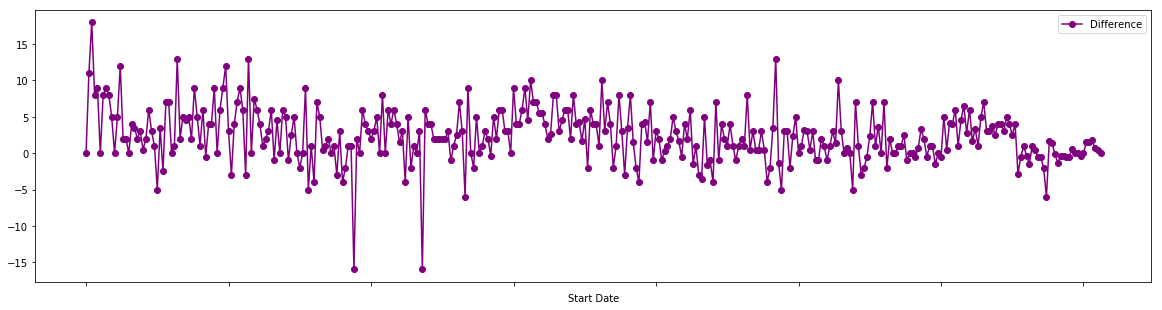

In [36]:
poll_df.plot(x = 'Start Date', y = 'Difference', figsize = (20,5), linestyle = '-', marker = 'o', color = 'purple')

In [38]:
#The results above show a linearly decreasing trend with time. 
#There would be more value in looking at how the polls are in October - which is the month prior to the election. US Elections always happen in November of leap years
#Looking at October polls would best predict who will win the presidential election, as that data is the most recent data available, assuming nothing unprecendented happens to sway public opinion in the interim

row_in = 0
xlimit = []

for date in poll_df['Start Date']:
    
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in +=1
        
    else:
        row_in += 1

min(xlimit), max(xlimit)

(325, 352)

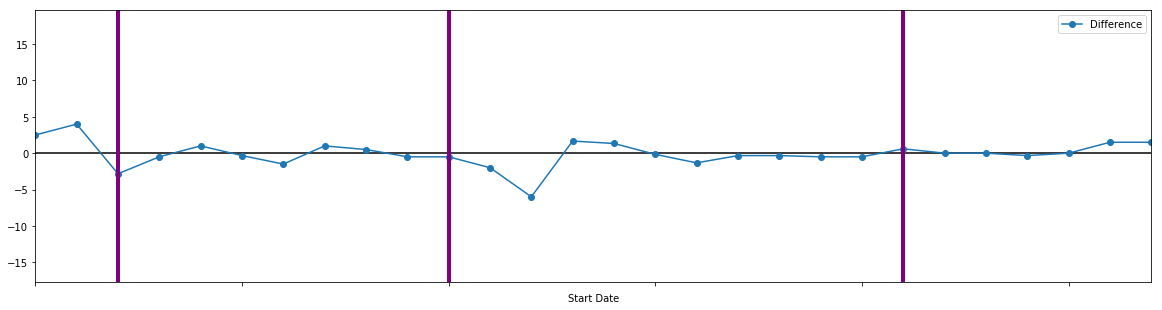

In [47]:
fig1 = poll_df.plot(x = 'Start Date', y = 'Difference', xlim = (min(xlimit), max(xlimit)), linestyle = '-', figsize = (20,5), marker = 'o')

#Visualizing how public support would change over the weeks
#The polls seem to be constant from week 3 (October 21) onwards -> Obama has a lead as week 3 shows a positive difference and the function is defined as Obama - Romney

plt.axvline(x = min(xlimit) + 2, linewidth = 4, color = 'purple')
plt.axvline(x = min(xlimit) + 10, linewidth = 4, color = 'purple')
plt.axvline(x = min(xlimit) + 21, linewidth = 4, color = 'purple')

y = 0

plt.hlines(y, min(xlimit), max(xlimit), colors='k', linestyles='solid')

In [95]:
pwd()

'/Users/mohammadananjaved/Desktop/Machine Learning'

In [49]:
#Reading in donor data

donor_df = pd.read_csv('Election_Donor_Data.csv')

/Users/mohammadananjaved/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [50]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-Jun-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-Jun-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-Jul-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-Aug-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-Jun-11,NaN,NaN,NaN,SA17A,736166


In [54]:
#Finding the count of the different contribution amounts made by the different donors

don_val = donor_df['contb_receipt_amt'].value_counts()

print(don_val)

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 174.80          1
 7.27            1
 1219.00         1
 1884.88         1
 162.25          1
 218.31          1
 78.62           1
 203.16          1
 53.11           1
 499.66          1
 19.53           1
 188.60          1
 47.10           1
 19.85           1
 28.83           1
 202.59          1
-5500.00         1
 9.25            1
 202.66          1
 1205.00         1
 80.73           1
 115.07     

In [55]:
#Finding the mean of the different donation amounts

cavg = donor_df['contb_receipt_amt'].mean()

print(cavg)

298.2351500951093


In [56]:
#Finding the standard deviation of the different donation amounts

cstd = donor_df['contb_receipt_amt'].std()

print(cstd)

3749.666723269043


In [140]:
print ('The average donation was %.2f with a std of %.2f' %(cavg,cstd))

The average donation was 298.24 with a std of 3749.67


In [63]:
#Finding the top donation values

top_donor = donor_df['contb_receipt_amt'].sort_values()

f_td = top_donor[top_donor > 0]

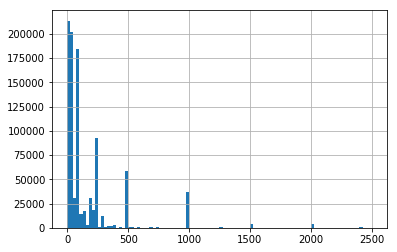

In [61]:
#Visualizing the most common donors with a histogram

comm_donor = f_td[f_td < 2500]

comm_donor.hist(bins = 100)

In [226]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-Jun-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-Jun-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-Jul-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-Aug-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-Jun-11,NaN,NaN,NaN,SA17A,736166


In [67]:
#Mapping donors with candidates

donor_df.cand_nm.unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [68]:
party_map = {'Bachmann, Michelle' : 'Republican', 'Romney, Mitt': 'Republican', 'Obama, Barack' : 'Democratic',
       "Roemer, Charles E. 'Buddy' III": 'Republican', 'Pawlenty, Timothy': 'Republican',
       'Johnson, Gary Earl': 'Republican', 'Paul, Ron': 'Republican', 'Santorum, Rick': 'Republican',
       'Cain, Herman' : 'Republican', 'Gingrich, Newt': 'Republican', 'McCotter, Thaddeus G': 'Republican',
       'Huntsman, Jon': 'Republican', 'Perry, Rick': 'Republican'}

In [69]:
donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [70]:
#Grouping number of donors by different candidates

g1 = donor_df.groupby('cand_nm')['contb_receipt_amt'].count()
g1

cand_nm
Bachmann, Michelle                 13140
Cain, Herman                       20107
Gingrich, Newt                     47679
Huntsman, Jon                       4156
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  74
Obama, Barack                     593746
Paul, Ron                         143757
Pawlenty, Timothy                   4555
Perry, Rick                        13575
Roemer, Charles E. 'Buddy' III      5920
Romney, Mitt                      107229
Santorum, Rick                     46559
Name: contb_receipt_amt, dtype: int64

In [73]:
#Finding the sum of donations for each candidate in millions

g2 = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

print(g2/1e+6)

cand_nm
Bachmann, Michelle                  2.677435
Cain, Herman                        7.047265
Gingrich, Newt                     12.011832
Huntsman, Jon                       3.204350
Johnson, Gary Earl                  0.566962
McCotter, Thaddeus G                0.037030
Obama, Barack                     133.502591
Paul, Ron                          20.722567
Pawlenty, Timothy                   4.255054
Perry, Rick                        18.411512
Roemer, Charles E. 'Buddy' III      0.367458
Romney, Mitt                       85.219249
Santorum, Rick                     10.728090
Name: contb_receipt_amt, dtype: float64


In [275]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

i = 0

for don in cand_amount:
    print (" The candidate %s raised %.0f dollars " %(cand_amount.index[i],don))
    print ('\n')
    i += 1

 The candidate Bachmann, Michelle raised 2677435 dollars 


 The candidate Cain, Herman raised 7047265 dollars 


 The candidate Gingrich, Newt raised 12011832 dollars 


 The candidate Huntsman, Jon raised 3204350 dollars 


 The candidate Johnson, Gary Earl raised 566962 dollars 


 The candidate McCotter, Thaddeus G raised 37030 dollars 


 The candidate Obama, Barack raised 133502591 dollars 


 The candidate Paul, Ron raised 20722567 dollars 


 The candidate Pawlenty, Timothy raised 4255054 dollars 


 The candidate Perry, Rick raised 18411512 dollars 


 The candidate Roemer, Charles E. 'Buddy' III raised 367458 dollars 


 The candidate Romney, Mitt raised 85219249 dollars 


 The candidate Santorum, Rick raised 10728090 dollars 




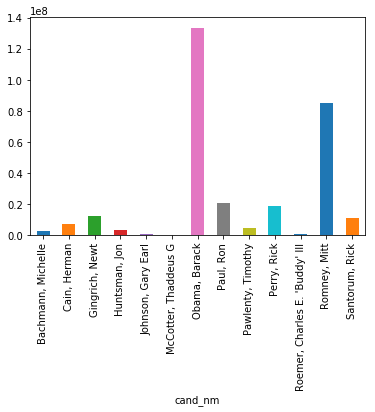

In [276]:
cand_amount.plot(kind = 'bar')

In [277]:
g3 = donor_df.groupby('Party')['contb_receipt_amt'].sum()

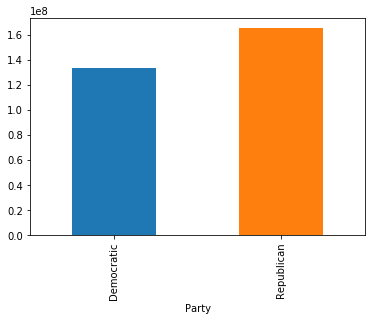

In [283]:
g3.plot(kind = 'bar')

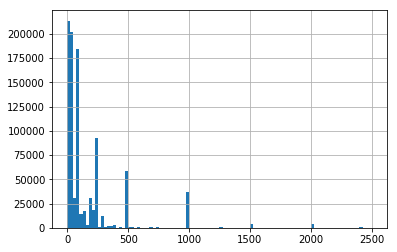

In [74]:
eall_d = donor_df.contb_receipt_amt
pos_d = all_d[all_d > 0]
sub_d = pos_d[pos_d < 2500]
sub_d.hist(bins = 100)

In [318]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-Jun-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-Jun-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-Jul-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-Aug-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-Jun-11,NaN,NaN,NaN,SA17A,736166,Republican


In [319]:
sub_d

0           250.0
1            50.0
2           250.0
3           250.0
4           300.0
5           500.0
6           250.0
7           250.0
8           250.0
9           250.0
10          250.0
11          500.0
12          250.0
13          250.0
14          250.0
15          300.0
16          500.0
17         1000.0
18          250.0
19          300.0
20          500.0
21          250.0
24          150.0
25          200.0
26          100.0
27          250.0
28          500.0
29          250.0
30          100.0
31          500.0
            ...  
1001633    1000.0
1001642     250.0
1001643     400.0
1001644     500.0
1001645     250.0
1001646     250.0
1001647     500.0
1001658     500.0
1001665     250.0
1001667     500.0
1001672     250.0
1001675     250.0
1001676     300.0
1001695     625.0
1001696    1000.0
1001697    1500.0
1001700     300.0
1001705    1000.0
1001711    1000.0
1001714     250.0
1001715     250.0
1001716    1000.0
1001717     100.0
1001720     100.0
1001721   

In [321]:
sum = donor_df.groupby('cand_nm').contb_receipt_amt.sum()

sum.hist(

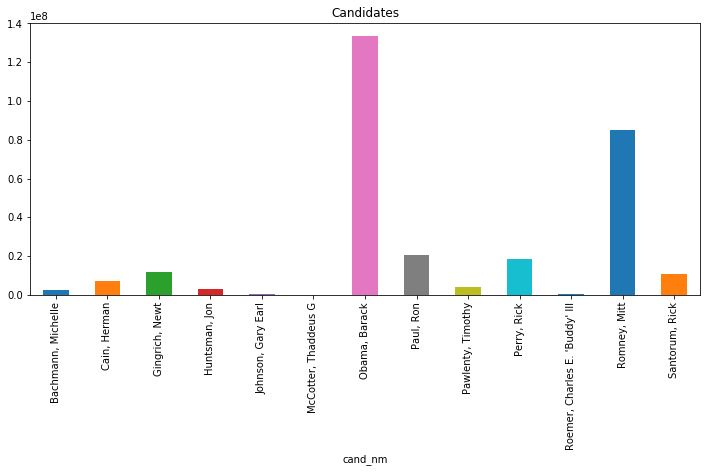

In [326]:
sum.plot(kind = 'bar', figsize = (12,5), title = 'Candidates', legend = False)